# Mean Median Imputation
Mean or median imputation consists of replacing all occurrences of missing values (NA) within a variable with the mean or median of that variable. This method is suitable for numerical variables. ... If the variable has a skewed distribution, then the median is a better representation.

### When should we apply mean median mode?
* When data is missing completely at random  (MCAR). Mean Median imputation has the assumption that the data are missing completely at random (MCAR).We solve this by replacing the NaN with most frequent occurance of the variables.
* When data values are less missing like < 5% and > 95%

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/home/saad/Downloads/train.csv',
            usecols=['LotFrontage','MasVnrArea','MoSold','SalePrice'])
df.head()

,LotFrontage,MasVnrArea,MoSold,SalePrice
0,65.0,196.0,2,208500
1,80.0,0.0,5,181500
2,68.0,162.0,9,223500
3,60.0,0.0,2,140000
4,84.0,350.0,12,250000


In [4]:
df.isnull().mean().sort_values(ascending=False)*100

LotFrontage    17.739726
MasVnrArea      0.547945
MoSold          0.000000
SalePrice       0.000000
dtype: float64

In [5]:
df.shape

(1460, 4)

In [6]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)

Shape of X_train is:  (1095, 3)
Shape of X_test is:  (365, 3)


In [8]:
X_train['LotFrontage_Mean'] = X_train['LotFrontage'].fillna(df['LotFrontage'].mean())
X_train['LotFrontage_Median'] = X_train['LotFrontage'].fillna(df['LotFrontage'].median())

X_train['MasVnrArea_Mean'] = X_train['MasVnrArea'].fillna(df['MasVnrArea'].mean())
X_train['MasVnrArea_Median'] = X_train['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [9]:
X_train.sample(5)

,LotFrontage,MasVnrArea,MoSold,LotFrontage_Mean,LotFrontage_Median,MasVnrArea_Mean,MasVnrArea_Median
349,56.0,870.0,4,56.000000,56.0,870.0,870.0
1381,NaN,0.0,5,70.049958,69.0,0.0,0.0
896,50.0,0.0,4,50.000000,50.0,0.0,0.0
232,21.0,297.0,6,21.000000,21.0,297.0,297.0
1455,62.0,0.0,8,62.000000,62.0,0.0,0.0


In [10]:
X_train.isnull().sum()

LotFrontage           200
MasVnrArea              4
MoSold                  0
LotFrontage_Mean        0
LotFrontage_Median      0
MasVnrArea_Mean         0
MasVnrArea_Median       0
dtype: int64

In [11]:
def figure_plot(df,feature1,feature2,feature3):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # original variable distribution
    df[feature1].plot(kind='kde')

    # variable imputed with the median
    df[feature2].plot(kind='kde', color='g')

    # variable imputed with the mean
    df[feature3].plot(kind='kde', color='r')

    # add legends
    plt.legend()

    #lines, labels = ax.get_legend_handles_labels()
    #ax.legend(lines, labels, loc='best')

    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

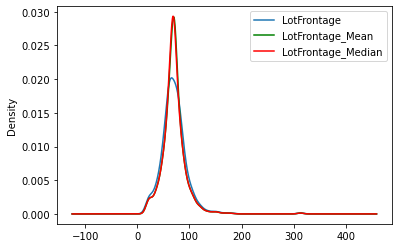

In [12]:
figure_plot(X_train,'LotFrontage','LotFrontage_Mean','LotFrontage_Median')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

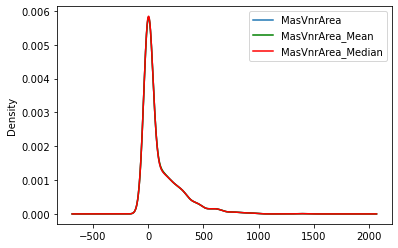

In [13]:
figure_plot(X_train,'MasVnrArea','MasVnrArea_Mean','MasVnrArea_Median')

In [14]:
# so variance will reduce after applying mean median
print("Original variance of LotFrontage:               ",X_train['LotFrontage'].var())
print("variance of LotFrontage after applying Mean:    ",X_train['LotFrontage_Mean'].var())
print("variance of LotFrontage after applying Median:  ",X_train['LotFrontage_Median'].var())
print()
print()
print("Original variance of MasVnrArea: ",X_train['MasVnrArea'].var())
print("variance of LotFrontage after applying Mean:    ",X_train['MasVnrArea_Mean'].var())
print("variance of LotFrontage after applying Median:  ",X_train['MasVnrArea_Median'].var())

Original variance of LotFrontage:                636.013167860222
variance of LotFrontage after applying Mean:     519.7579229450237
variance of LotFrontage after applying Median:   520.0307330144473


Original variance of MasVnrArea:  29461.908142517503
variance of LotFrontage after applying Mean:     29354.1867233154
variance of LotFrontage after applying Median:   29393.111433889742


In [15]:
X_train.cov()

,LotFrontage,MasVnrArea,MoSold,LotFrontage_Mean,LotFrontage_Median,MasVnrArea_Mean,MasVnrArea_Median
LotFrontage,636.013168,933.179382,1.899515,636.013168,636.013168,929.887818,934.084315
MasVnrArea,933.179382,29461.908143,-0.343958,761.663470,758.537027,29461.908143,29461.908143
MoSold,1.899515,-0.343958,7.187193,1.561174,1.588362,-0.343119,-0.206018
LotFrontage_Mean,636.013168,761.663470,1.561174,519.757923,519.811964,758.868090,762.306198
LotFrontage_Median,636.013168,758.537027,1.588362,519.811964,520.030733,755.752996,759.217913
MasVnrArea_Mean,929.887818,29461.908143,-0.343119,758.868090,755.752996,29354.186723,29354.067064
MasVnrArea_Median,934.084315,29461.908143,-0.206018,762.306198,759.217913,29354.067064,29393.111434


In [16]:
X_train.corr() # in coorelation we just see a minor difference because the value of carrelation is between -1 to 1
# but in covariance there is no limit

,LotFrontage,MasVnrArea,MoSold,LotFrontage_Mean,LotFrontage_Median,MasVnrArea_Mean,MasVnrArea_Median
LotFrontage,1.000000,0.215604,0.028025,1.000000,1.000000,0.215320,0.216169
MasVnrArea,0.215604,1.000000,-0.000748,0.194506,0.193655,1.000000,1.000000
MoSold,0.028025,-0.000748,1.000000,0.025543,0.025981,-0.000747,-0.000448
LotFrontage_Mean,1.000000,0.194506,0.025543,1.000000,0.999842,0.194281,0.195032
LotFrontage_Median,1.000000,0.193655,0.025981,0.999842,1.000000,0.193433,0.194191
MasVnrArea_Mean,0.215320,1.000000,-0.000747,0.194281,0.193433,1.000000,0.999334
MasVnrArea_Median,0.216169,1.000000,-0.000448,0.195032,0.194191,0.999334,1.000000


<AxesSubplot:>

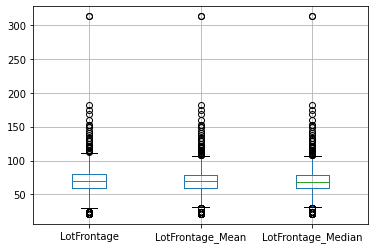

In [17]:
X_train[['LotFrontage','LotFrontage_Mean','LotFrontage_Median']].boxplot() # so there is change in outliers
# i reject this method for LotFrontage feature

<AxesSubplot:>

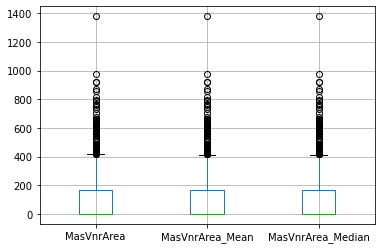

In [18]:
X_train[['MasVnrArea','MasVnrArea_Mean','MasVnrArea_Median']].boxplot() # so there is no outliers after applying
# mean and median so i accept it for my MasVnrArea feature

## Using Sklearn

In [19]:
df = pd.read_csv('/home/saad/Downloads/train.csv',
            usecols=['LotFrontage','MasVnrArea','MoSold','SalePrice'])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf = ColumnTransformer([
    ('imputer1',imputer1,['LotFrontage']),
    ('imputer2',imputer2,['MasVnrArea'])
],remainder='passthrough')

In [22]:
trf.fit_transform(X_train)

array([[ 80., 320.,   9.],
       [ 70.,   0.,   7.],
       [ 24.,   0.,   6.],
       ...,
       [ 70.,   0.,   6.],
       [ 67., 268.,  11.],
       [ 60.,   0.,   7.]])

In [23]:
trf.named_transformers_['imputer1'].statistics_

array([70.])

In [24]:
trf.named_transformers_['imputer2'].statistics_

array([100.57142857])

In [25]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [26]:
X_train

array([[ 80., 320.,   9.],
       [ 70.,   0.,   7.],
       [ 24.,   0.,   6.],
       ...,
       [ 70.,   0.,   6.],
       [ 67., 268.,  11.],
       [ 60.,   0.,   7.]])

In [27]:
pd.DataFrame(X_train, columns=df.iloc[:,0:3].columns)

,LotFrontage,MasVnrArea,MoSold
0,80.0,320.0,9.0
1,70.0,0.0,7.0
2,24.0,0.0,6.0
3,88.0,366.0,9.0
4,60.0,0.0,3.0
...,...,...,...
1163,85.0,0.0,4.0
1164,80.0,0.0,8.0
1165,70.0,0.0,6.0
1166,67.0,268.0,11.0


# Advantages and Disadvantages of Mean/Median Imputation

### Advantage

* Easy to implement, Faster way to obtain the complete Dataset
* It is useful when your data is normally distributed or have less missing values like < 5% and > 95%

### Disadvantage

* Change or Distortion in the original variance of the Data  (change the distribution of the data)
* Mean Imputation deosn't preserve relationship between variables such as correlation  (covariance & correlation changes)
* very small or very large values can effect the mean() instead of median() can't effect by very small and very large values
* the mean is very susceptible to outliers (it's non-robust), while the median is not affected by outliers (it's robust).